In [2]:
import tensorflow as tf
from keras.datasets import fashion_mnist

mnist = tf.keras.datasets.fashion_mnist
(train_img, train_lbl), (test_img, test_lbl) = mnist.load_data()

train_img  = train_img .reshape(60000, 784)
test_img  = test_img.reshape (10000, 784)

train_img = train_img/255
test_img = test_img/255

32768/29515 [=================================] - 0s 0us/step


Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential([Dense(10, activation='softmax', input_shape=(784, ))])

In [4]:
from keras import optimizers

model.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [5]:
import timeit

tic = timeit.default_timer()
trained_model = model.fit(train_img, train_lbl, batch_size=32, epochs=50,  verbose=1, validation_data=(test_img, test_lbl))
toc = timeit.default_timer()

print('Time: ', toc - tic) 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/50





60000/60000 [==============================] - 12s 198us/step - loss: 0.5954 - acc: 0.7991 - val_loss: 0.5064 - val_acc: 0.8269
Epoch 2/50
60000/60000 [==============================] - 7s 122us/step - loss: 0.4604 - acc: 0.8431 - val_loss: 0.4956 - val_acc: 0.8285
Epoch 3/50
60000/60000 [==============================] - 7s 118us/step - loss: 0.4350 - acc: 0.8501 - val_loss: 0.4610 - val_acc: 0.8367
Epoch 4/50
60000/60000 [==============================] - 7s 124us/step - loss: 0.4212 - acc: 0.8545 - val_loss: 0.4528 - val_acc: 0.8415
Epoch 5/50
60000/60000 [==============================] - 7s 123us/step - loss: 0.4124 - acc: 0.8573 - val_loss: 0.4569 - val_acc: 0.8406
Epoch 6/50
60000/60000 [==============================] - 8s 125us/step - loss: 0.4065 - acc: 0.8594 - val_loss: 0.4498 - val_acc: 0.8424
Epoch 7/50
60000/60

In [0]:
history = trained_model.history
acc_val = history['val_acc']
acc_tra = history['acc']

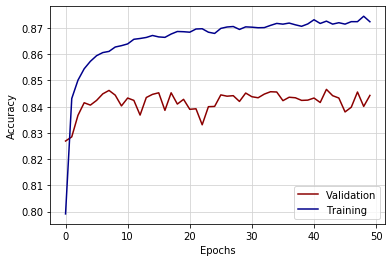

In [7]:
import matplotlib.pyplot as plt

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(acc_val, 'darkred')
plt.plot(acc_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()